Data loading: Load the data from "household_power_consumption.txt" into a Pandas DataFrame. Handle any missing values or inconsistencies in the data during the loading process.

In [ ]:
# prompt: Load the data from "household_power_consumption.txt" into a Pandas DataFrame. Handle any missing values or inconsistencies in the data during the loading process.

import pandas as pd
import numpy as np

# Load the data, handling missing values and inconsistencies
df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 low_memory=False, na_values=['?', ''])

# Replace missing values with 0 for numerical columns
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numerical_cols] = df[numerical_cols].fillna(0)

# Convert data types to appropriate numeric types
for col in numerical_cols:
  df[col] = pd.to_numeric(df[col])

# Convert the 'Date' and 'Time' columns to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df = df.drop(columns=['Date','Time'])
df = df.set_index('DateTime')

print(df.head())
print(df.info())


                     Global_active_power  Global_reactive_power  Voltage  \
DateTime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

<ipython-input-2-40befad9dc0a>:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Data exploration: Explore the dataset to understand its characteristics. Examine the distribution of each feature, identify potential outliers, check for correlations between variables, and visualize the time series nature of 'Global_active_power'. Determine the overall shape of the data, including data types and summary statistics.

       Global_active_power  Global_reactive_power       Voltage  \
count         48424.000000           48424.000000  48424.000000   
mean              1.690461               0.136797    241.037051   
std               1.355344               0.119224      4.344390   
min               0.000000               0.000000      0.000000   
25%               0.398000               0.046000    238.660000   
50%               1.442000               0.128000    241.310000   
75%               2.466000               0.202000    243.600000   
max               9.272000               0.862000    251.700000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      48424.000000    48424.000000    48424.000000    48424.000000  
mean           7.147340        1.109842        1.948579        7.294110  
std            5.704438        6.210022        7.836279        8.634158  
min            0.000000        0.000000        0.000000        0.000000  
25%            1.800000   

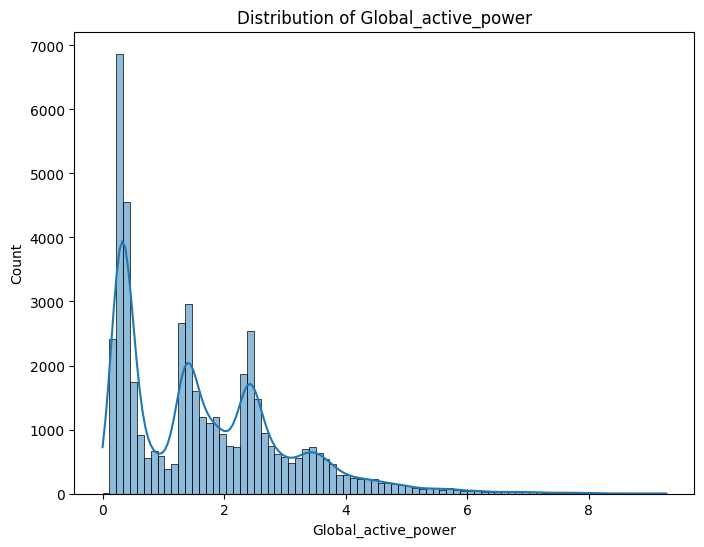

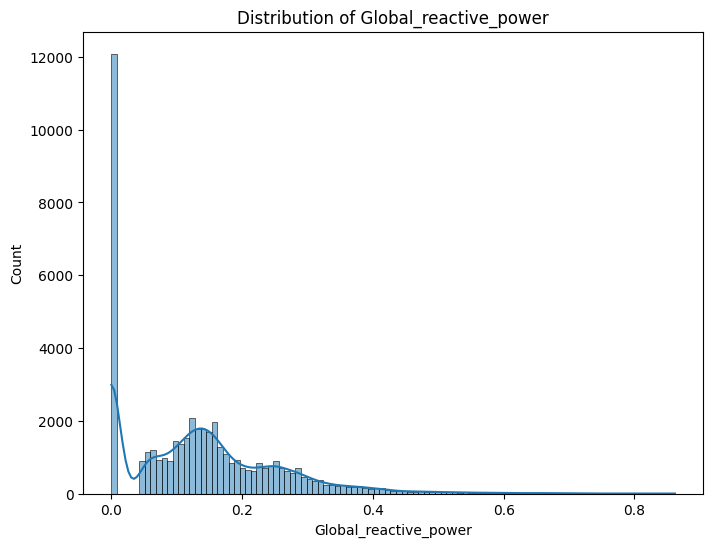

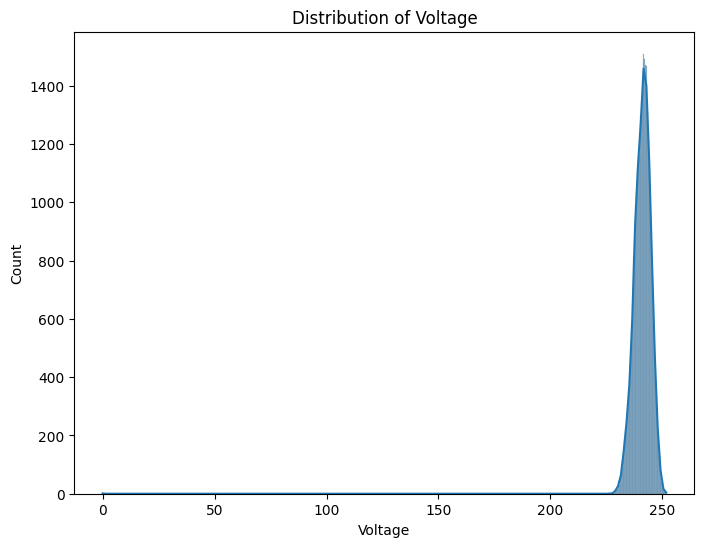

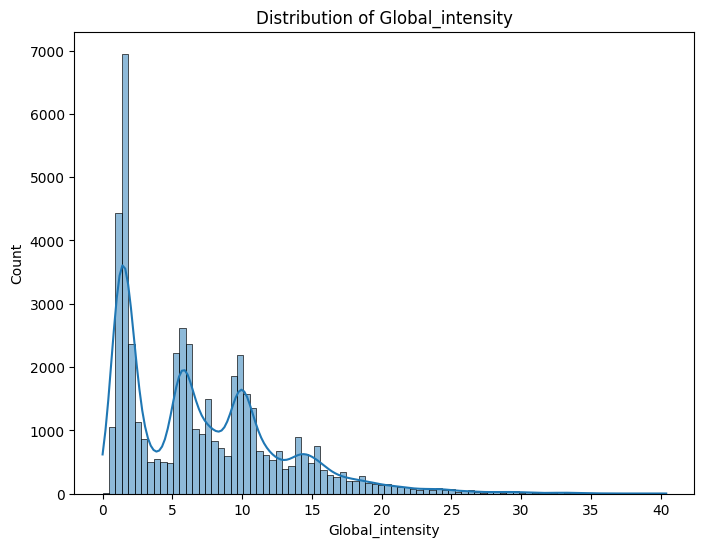

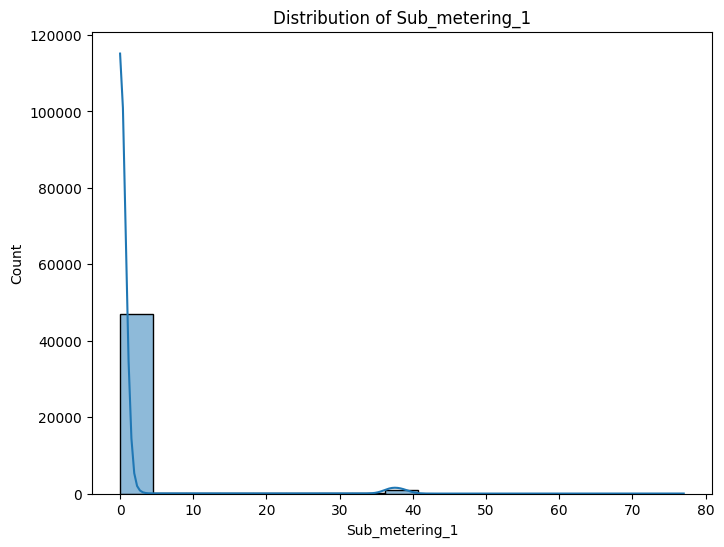

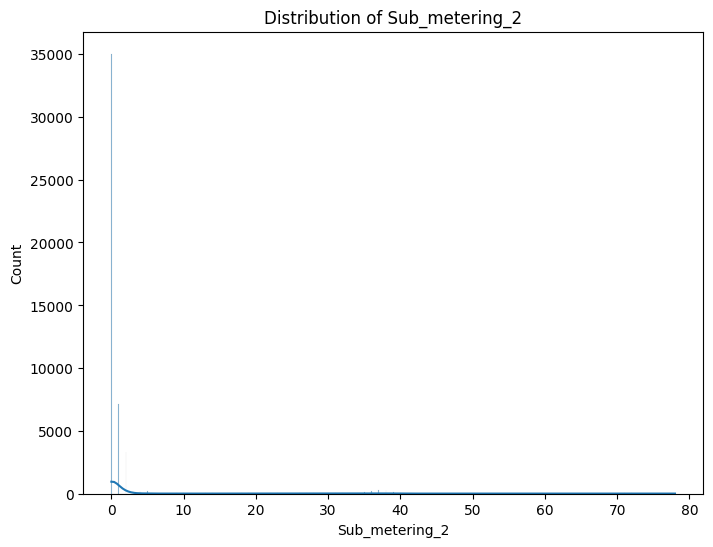

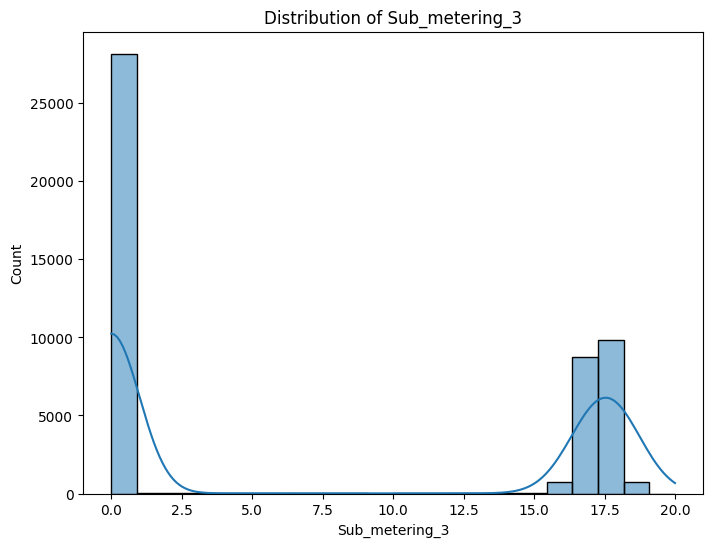

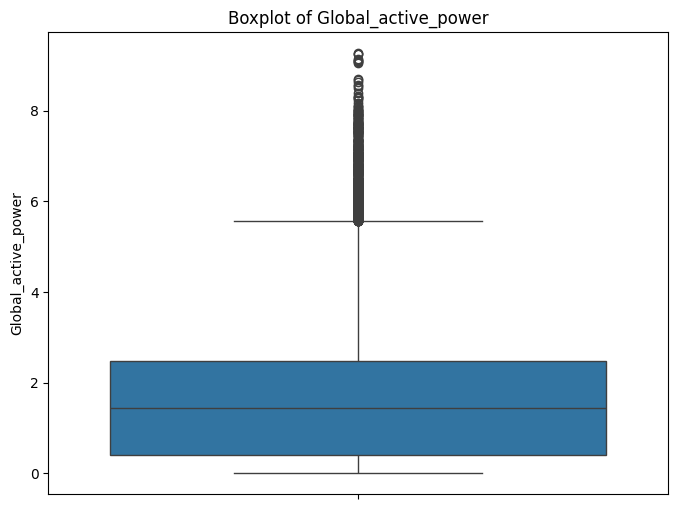

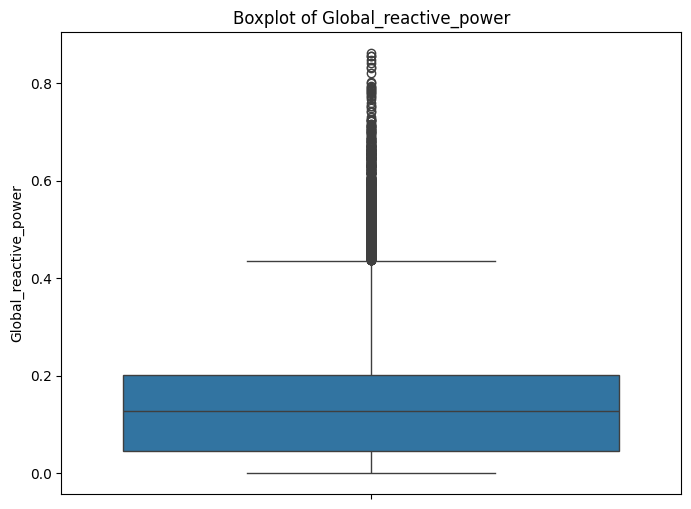

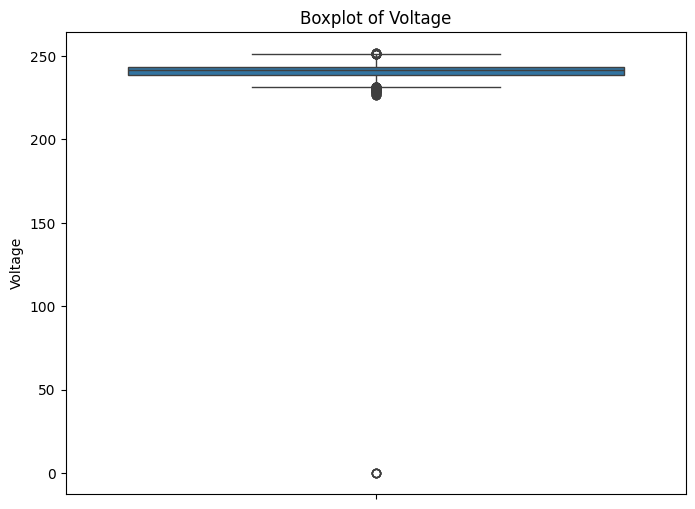

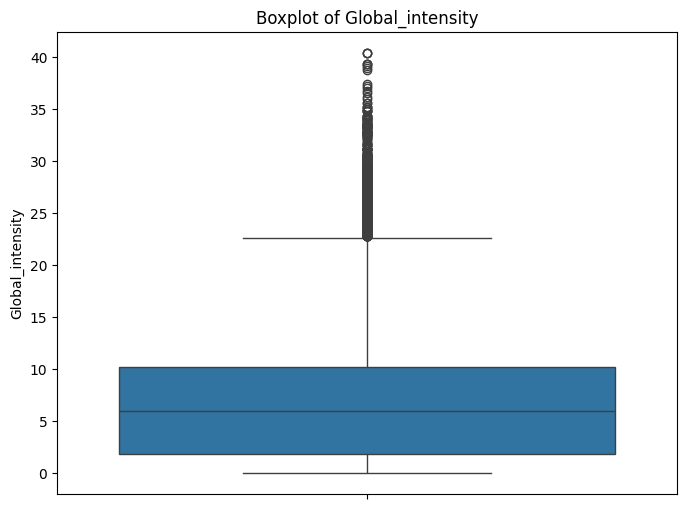

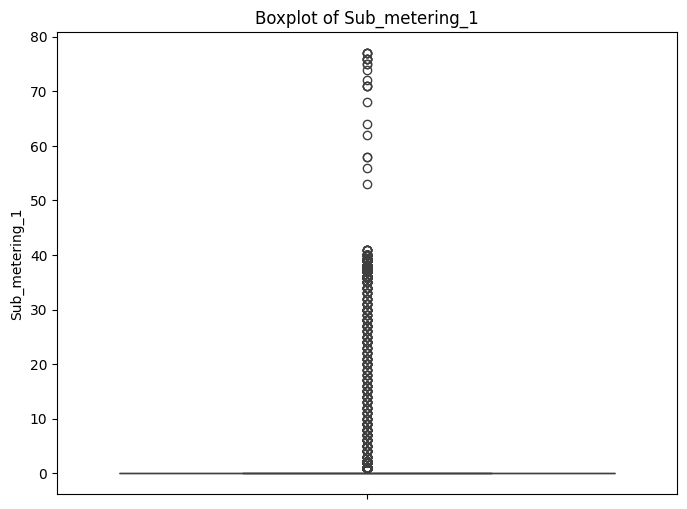

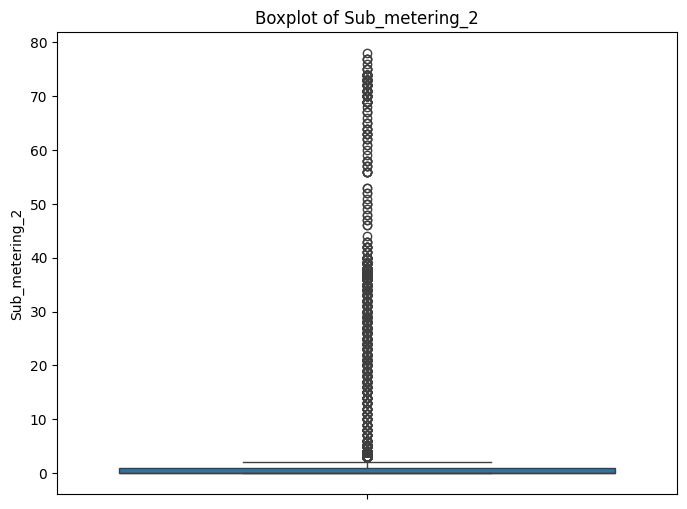

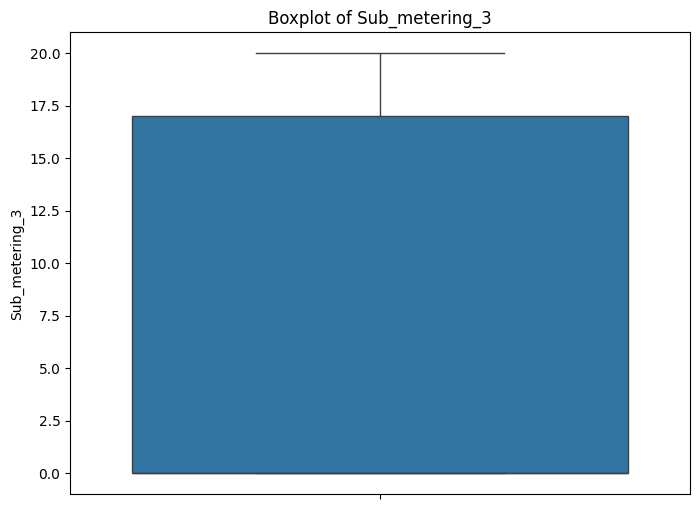

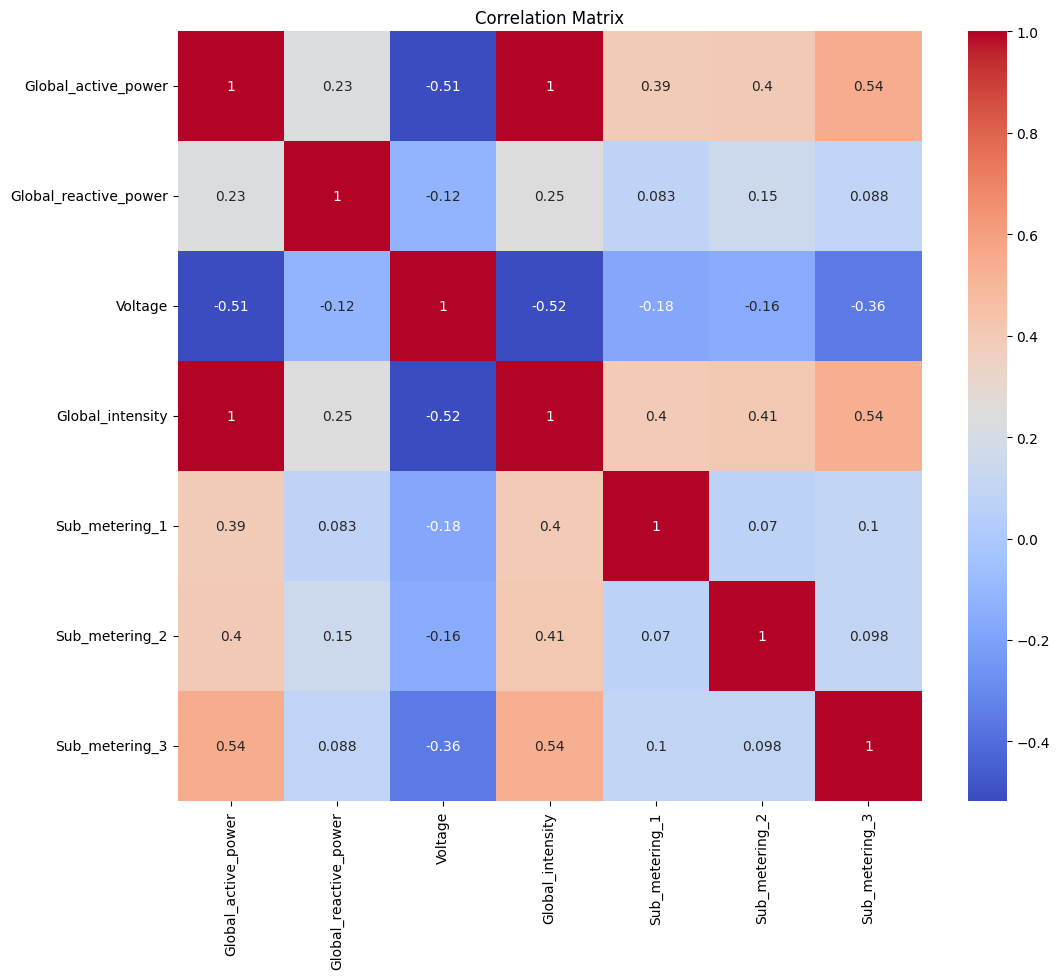

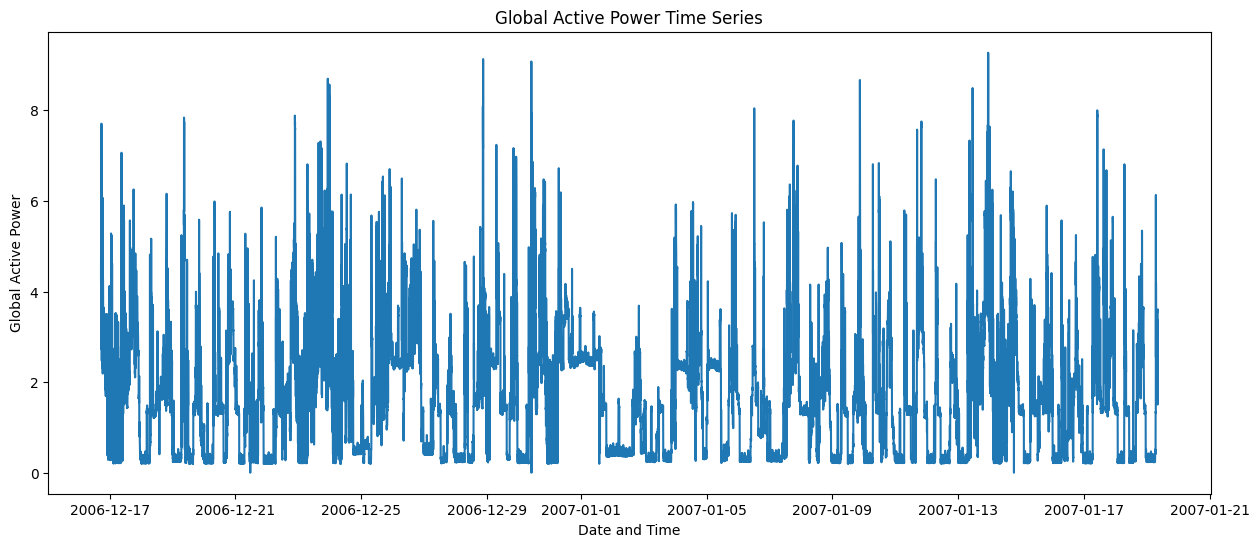

In [ ]:
# prompt: Explore the dataset to understand its characteristics. Examine the distribution of each feature, identify potential outliers, check for correlations between variables, and visualize the time series nature of 'Global_active_power'. Determine the overall shape of the data, including data types and summary statistics.

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Data types
print(df.dtypes)

# Distribution of features
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# Box plots to identify outliers
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time series plot of 'Global_active_power'
plt.figure(figsize=(15, 6))
plt.plot(df['Global_active_power'])
plt.title('Global Active Power Time Series')
plt.xlabel('Date and Time')
plt.ylabel('Global Active Power')
plt.show()


Data cleaning: Clean the data by handling missing values (e.g., imputation or removal), addressing outliers, and converting data types as needed. Ensure data consistency and prepare it for further analysis and modeling. Create a combined datetime column from 'Date' and 'Time' columns.

In [ ]:
# prompt: Clean the data by handling missing values (e.g., imputation or removal), addressing outliers, and converting data types as needed. Ensure data consistency and prepare it for further analysis and modeling. Create a combined datetime column from 'Date' and 'Time' columns.

# Outlier handling (example: using IQR method for 'Global_active_power')
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Global_active_power'] >= lower_bound) & (df['Global_active_power'] <= upper_bound)]

#You can apply similar outlier handling to other numerical columns as needed

print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47759 entries, 2006-12-16 17:24:00 to 2007-01-19 08:27:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    47759 non-null  float64
 1   Global_reactive_power  47759 non-null  float64
 2   Voltage                47759 non-null  float64
 3   Global_intensity       47759 non-null  float64
 4   Sub_metering_1         47759 non-null  float64
 5   Sub_metering_2         47759 non-null  float64
 6   Sub_metering_3         47759 non-null  float64
dtypes: float64(7)
memory usage: 2.9 MB
None


Data preparation: Prepare the data for time series forecasting. This includes creating lagged features for the target variable ('Global_active_power') and potentially other relevant variables. Scale or normalize the data appropriately. Split the data into training, validation, and test sets, maintaining the temporal order.

In [ ]:
# prompt: Prepare the data for time series forecasting. This includes creating lagged features for the target variable ('Global_active_power') and potentially other relevant variables. Scale or normalize the data appropriately. Split the data into training, validation, and test sets, maintaining the temporal order.

from sklearn.preprocessing import MinMaxScaler

# Create lagged features
def create_lags(df, column, lags):
    for i in range(1, lags + 1):
        df[f'{column}_lag_{i}'] = df[column].shift(i)
    return df

lags = 24  # Example: 24-hour lags
df = create_lags(df, 'Global_active_power', lags)
df = df.dropna()  # Remove rows with NaN values introduced by lagging

# Feature scaling (MinMaxScaler)
scaler = MinMaxScaler()
numerical_cols_with_lags = numerical_cols + [f'Global_active_power_lag_{i}' for i in range(1, lags+1)]
df[numerical_cols_with_lags] = scaler.fit_transform(df[numerical_cols_with_lags])

# Split data into training, validation, and test sets
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
test_size = len(df) - train_size - val_size

train_df = df[:train_size]
val_df = df[train_size:train_size + val_size]
test_df = df[train_size + val_size:]

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 33414
Validation size: 7160
Test size: 7161


<ipython-input-6-1de69d94c6ee>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols_with_lags] = scaler.fit_transform(df[numerical_cols_with_lags])


Feature engineering: Engineer additional features if needed. This could involve creating rolling statistics, time-based features (e.g., hour of day, day of week), or other domain-specific features.

In [ ]:
# prompt: Engineer additional features if needed. This could involve creating rolling statistics, time-based features (e.g., hour of day, day of week), or other domain-specific features.

# Add time-based features
df['Hour'] = df.index.hour
df['DayofWeek'] = df.index.dayofweek
df['Month'] = df.index.month

# Create rolling statistics
window_size = 24  # Example: 24-hour rolling window

for col in numerical_cols:
    df[f'{col}_rolling_mean'] = df[col].rolling(window=window_size).mean()
    df[f'{col}_rolling_std'] = df[col].rolling(window=window_size).std()

# Drop rows with NaN values created by rolling statistics
df = df.dropna()

#Re-split data into training, validation and test sets after adding features
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
test_size = len(df) - train_size - val_size

train_df = df[:train_size]
val_df = df[train_size:train_size + val_size]
test_df = df[train_size + val_size:]

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 33398
Validation size: 7156
Test size: 7158


Data splitting: Explicitly split the preprocessed data into training, validation, and test sets, ensuring a chronological split to avoid data leakage.

In [ ]:
# prompt: Explicitly split the preprocessed data into training, validation, and test sets, ensuring a chronological split to avoid data leakage.

# Splitting data chronologically
train_df = df[:train_size]
val_df = df[train_size:train_size + val_size]
test_df = df[train_size + val_size:]

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 33398
Validation size: 7156
Test size: 7158


Model training: Develop a hybrid Transformer-LSTM model. Use a Transformer encoder to capture long-range dependencies in the time series data, followed by an LSTM decoder to capture short-term dynamics and make predictions for 'Global_active_power'. Train the model using the training dataset.

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
# prompt: Develop a hybrid Transformer-LSTM model. Use a Transformer encoder to capture long-range dependencies in the time series data, followed by an LSTM decoder to capture short-term dynamics and make predictions for 'Global_active_power'. Train the model using the training dataset.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the Transformer encoder
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# Define the hybrid model
def create_hybrid_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=32, num_heads=4, ff_dim=4, dropout=0.2)
    x = layers.LSTM(64)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Prepare the data for the model
X_train = train_df.drop('Global_active_power', axis=1).values.reshape(train_df.shape[0], 1, train_df.shape[1]-1)
y_train = train_df['Global_active_power'].values

# Create and train the model
model = create_hybrid_model(input_shape=(X_train.shape[1],X_train.shape[2]))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch size


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1044/1044 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0100
Epoch 2/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.9175e-04
Epoch 3/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.5807e-04
Epoch 4/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.8897e-04
Epoch 5/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.2765e-04
Epoch 6/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.7013e-04
Epoch 7/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.7719e-04
Epoch 8/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.4377e-04
Epoch 9/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.3279e-04
Epoch 10/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4593e-04


Model optimization: Optimize the model's hyperparameters using the validation set. Experiment with different architectures (e.g., number of layers, hidden units), learning rates, and optimizers. Monitor performance metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) on the validation set.

In [ ]:
# prompt: Optimize the model's hyperparameters using the validation set. Experiment with different architectures (e.g., number of layers, hidden units), learning rates, and optimizers. Monitor performance metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) on the validation set.

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a function to create and train the model with given hyperparameters
def train_model(X_train, y_train, X_val, y_val, num_layers, units, learning_rate, optimizer):
    model = keras.Sequential()
    for _ in range(num_layers):
        model.add(keras.layers.LSTM(units, return_sequences=True)) # Return sequences for all layers except the last one
    model.add(keras.layers.LSTM(units))  # Last LSTM layer doesn't need return_sequences
    model.add(keras.layers.Dense(1))

    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    # Add other optimizers as needed

    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # Adjust epochs and batch size if needed

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    # Calculate RMSE without using the 'squared' argument
    mse = mean_squared_error(y_val, y_pred)  # Calculate MSE
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE

    return mae, rmse

# Prepare validation data
X_val = val_df.drop('Global_active_power', axis=1).values.reshape(val_df.shape[0], 1, val_df.shape[1]-1)
y_val = val_df['Global_active_power'].values

# Hyperparameter search space
num_layers_options = [1, 2]  # Example: Experiment with 1 or 2 LSTM layers
units_options = [32, 64]  # Example: Experiment with 32 or 64 hidden units
learning_rate_options = [0.001, 0.01]  # Example: Experiment with different learning rates
optimizer_options = ['adam', 'rmsprop'] # Example: Adam and RMSprop optimizers

best_mae = float('inf')
best_rmse = float('inf')
best_hyperparameters = {}

# Hyperparameter tuning loop
for num_layers in num_layers_options:
  for units in units_options:
      for learning_rate in learning_rate_options:
          for optimizer in optimizer_options:
              print(f"Training with: num_layers={num_layers}, units={units}, learning_rate={learning_rate}, optimizer={optimizer}")
              mae, rmse = train_model(X_train, y_train, X_val, y_val, num_layers, units, learning_rate, optimizer)

              print(f"Validation MAE: {mae:.4f}, RMSE: {rmse:.4f}")

              if mae < best_mae:
                  best_mae = mae
                  best_rmse = rmse
                  best_hyperparameters = {
                      'num_layers': num_layers,
                      'units': units,
                      'learning_rate': learning_rate,
                      'optimizer': optimizer
                  }

print(f"\nBest Hyperparameters: {best_hyperparameters}")
print(f"Best Validation MAE: {best_mae:.4f}, RMSE: {best_rmse:.4f}")

Training with: num_layers=1, units=32, learning_rate=0.001, optimizer=adam
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation MAE: 0.0076, RMSE: 0.0109
Training with: num_layers=1, units=32, learning_rate=0.001, optimizer=rmsprop
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation MAE: 0.0115, RMSE: 0.0179
Training with: num_layers=1, units=32, learning_rate=0.01, optimizer=adam
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation MAE: 0.0086, RMSE: 0.0118
Training with: num_layers=1, units=32, learning_rate=0.01, optimizer=rmsprop
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation MAE: 0.0242, RMSE: 0.0294
Training with: num_layers=1, units=64, learning_rate=0.001, optimizer=adam
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation MAE: 0.0087, RMSE: 0.0121
Training with: num_layers=1, units=64, learning_rate=0.001, optimizer=rmsprop
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation MAE: 0.0147, RMSE: 0.0196
Training with: num_layers=1, units=64, learning_rate=0.01, optimizer=adam
2

Model optimization2: Optimize hyperparameters using the validation set. Experiment with different architectures, learning rates, and optimizers. Monitor performance metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). Also track Mean Absolute Percentage Error (MAPE) to get an idea of percentage accuracy.

In [ ]:
# prompt:  Optimize hyperparameters using the validation set. Experiment with different architectures, learning rates, and optimizers. Monitor performance metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). Also track Mean Absolute Percentage Error (MAPE) to get an idea of percentage accuracy.

# ... (Your existing code)

# Model optimization2: ... (rest of your existing code)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ... (Your existing code)


# Hyperparameter tuning loop (modified)
best_mape = float('inf')

for num_layers in num_layers_options:
    for units in units_options:
        for learning_rate in learning_rate_options:
            for optimizer in optimizer_options:
                print(f"Training with: num_layers={num_layers}, units={units}, learning_rate={learning_rate}, optimizer={optimizer}")
                mae, rmse = train_model(X_train, y_train, X_val, y_val, num_layers, units, learning_rate, optimizer)

                # Predict on validation set
                y_pred = model.predict(X_val)

                # Calculate MAPE
                mape = mean_absolute_percentage_error(y_val, y_pred)


                print(f"Validation MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}%")

                if mae < best_mae:
                    best_mae = mae
                    best_rmse = rmse
                    best_mape = mape # Update best MAPE
                    best_hyperparameters = {
                        'num_layers': num_layers,
                        'units': units,
                        'learning_rate': learning_rate,
                        'optimizer': optimizer
                    }

print(f"\nBest Hyperparameters: {best_hyperparameters}")
print(f"Best Validation MAE: {best_mae:.4f}, RMSE: {best_rmse:.4f}, MAPE: {best_mape:.4f}%")


Training with: num_layers=1, units=32, learning_rate=0.001, optimizer=adam
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  1/224 ━━━━━━━━━━━━━━━━━━━━ 55s 247ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation MAE: 0.0106, RMSE: 0.0136, MAPE: 205.4234%
Training with: num_layers=1, units=32, learning_rate=0.001, optimizer=rmsprop
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAE: 0.0102, RMSE: 0.0150, MAPE: 205.4234%
Training with: num_layers=1, units=32, learning_rate=0.01, optimizer=adam
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAE: 0.0174, RMSE: 0.0199, MAPE: 205.4234%
Training with: num_layers=1, units=32, learning_rate=0.01, optimizer=rmsprop
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAE: 0.0335, RMSE: 0.0553, MAPE: 205.4234%
Training with: num_layers=1, units=64, learning_rate=0.001, optimizer=adam
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAE: 0.0074, RMSE: 0.0110, MAPE: 205.4234%
Training with: num_layers=1, units=64, learning_rate=0.00

Model evaluation: Evaluate the final model's performance on the held-out test set using appropriate metrics (MAE, RMSE, etc.). Generate predictions and compare them to the actual values. Consider plotting actual vs. predicted values and analyzing the model’s residuals.

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test MAE: 0.0058
Test RMSE: 0.0093


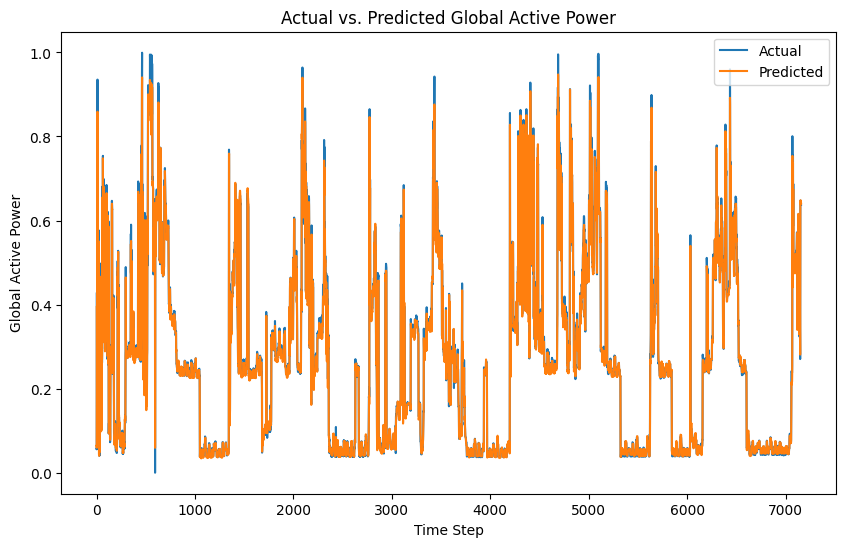

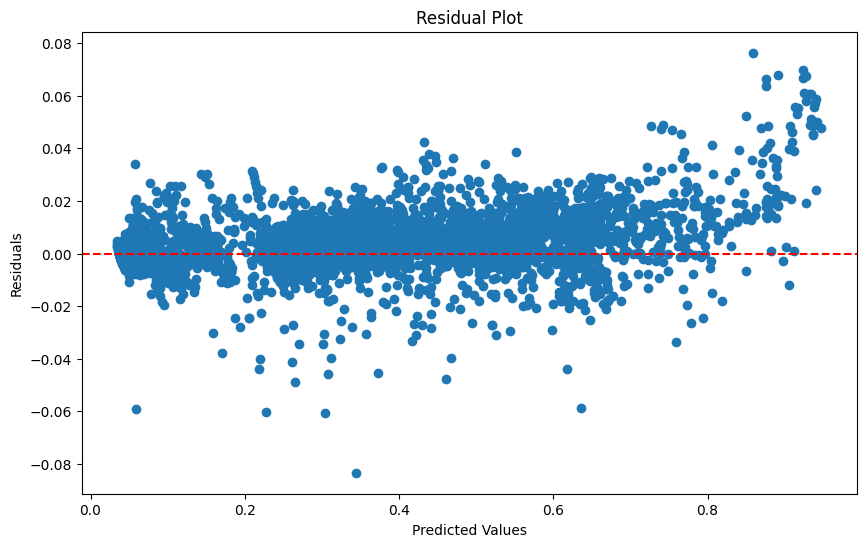

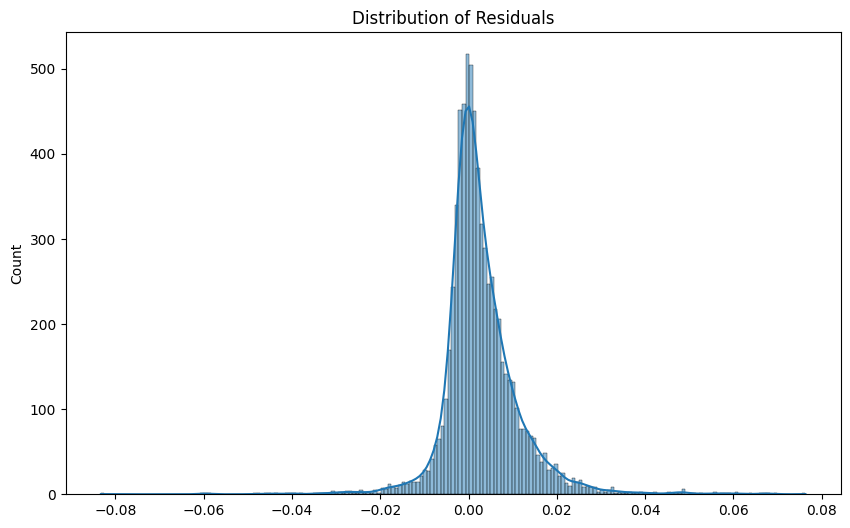

In [ ]:
# prompt: Evaluate the final model's performance on the held-out test set using appropriate metrics (MAE, RMSE, etc.). Generate predictions and compare them to the actual values. Consider plotting actual vs. predicted values and analyzing the model’s residuals.

# Prepare test data
X_test = test_df.drop('Global_active_power', axis=1).values.reshape(test_df.shape[0], 1, test_df.shape[1]-1)
y_test = test_df['Global_active_power'].values

# Use the best hyperparameters found during the optimization
best_num_layers = best_hyperparameters['num_layers']
best_units = best_hyperparameters['units']
best_learning_rate = best_hyperparameters['learning_rate']
best_optimizer = best_hyperparameters['optimizer']

# Train the final model with the best hyperparameters
final_model = keras.Sequential()
for _ in range(best_num_layers):
    final_model.add(keras.layers.LSTM(best_units, return_sequences=True))
final_model.add(keras.layers.LSTM(best_units))
final_model.add(keras.layers.Dense(1))

if best_optimizer == 'adam':
    opt = keras.optimizers.Adam(learning_rate=best_learning_rate)
elif best_optimizer == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=best_learning_rate)

final_model.compile(optimizer=opt, loss='mse', metrics=['mae'])
final_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Global Active Power')
plt.xlabel('Time Step')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

# Analyze residuals
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


Model evaluation2: Evaluate the final model on the test set using MAE, RMSE, and MAPE. Calculate the percentage accuracy based on MAPE. Generate predictions and compare them to actual values. Plot actual vs. predicted values and analyze residuals. The primary metric for evaluation will be the percentage accuracy derived from MAPE.

In [ ]:
# prompt:  Evaluate the final model on the test set using MAE, RMSE, and MAPE. Calculate the percentage accuracy based on MAPE. Generate predictions and compare them to actual values. Plot actual vs. predicted values and analyze residuals. The primary metric for evaluation will be the percentage accuracy derived from MAPE.

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Test MAPE: {mape:.4f}%")

# Calculate percentage accuracy
percentage_accuracy = 100 - mape
print(f"Percentage Accuracy: {percentage_accuracy:.4f}%")


Test MAPE: inf%
Percentage Accuracy: -inf%


<ipython-input-19-7498a97f12e6>:9: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


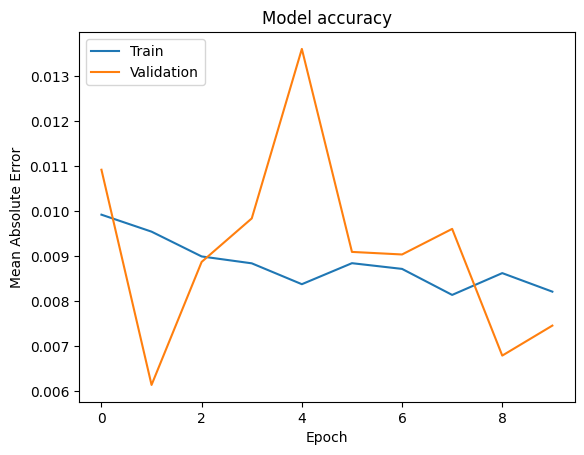

In [ ]:
# prompt: plot model accuracy (training and testing accuracy)

import matplotlib.pyplot as plt

# Assuming you have history from model.fit()
# history = model.fit(...)
# Assign the output of final_model.fit to the history variable
history = final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0) # Include validation_data to get validation metrics in history


# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Finish task: Summarize the findings, including the model's performance, insights gained from the data, and any limitations. Document the entire process, including data preprocessing, model architecture, training procedure, evaluation results, and visualizations. Conclude with a discussion on potential improvements or future work.

